# **LGBM & XGBM**

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

# Exploratory Data Analysis (EDA):

In [7]:
#1.Load the Titanic dataset using Python's pandas library.
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#load datasets
train_df = pd.read_csv("/content/drive/MyDrive/Python excelr/Titanic_test.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Python excelr/Titanic_train.csv")
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_df.shape

(418, 11)

In [9]:
train_df.isnull().sum() #we should check the missing values

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


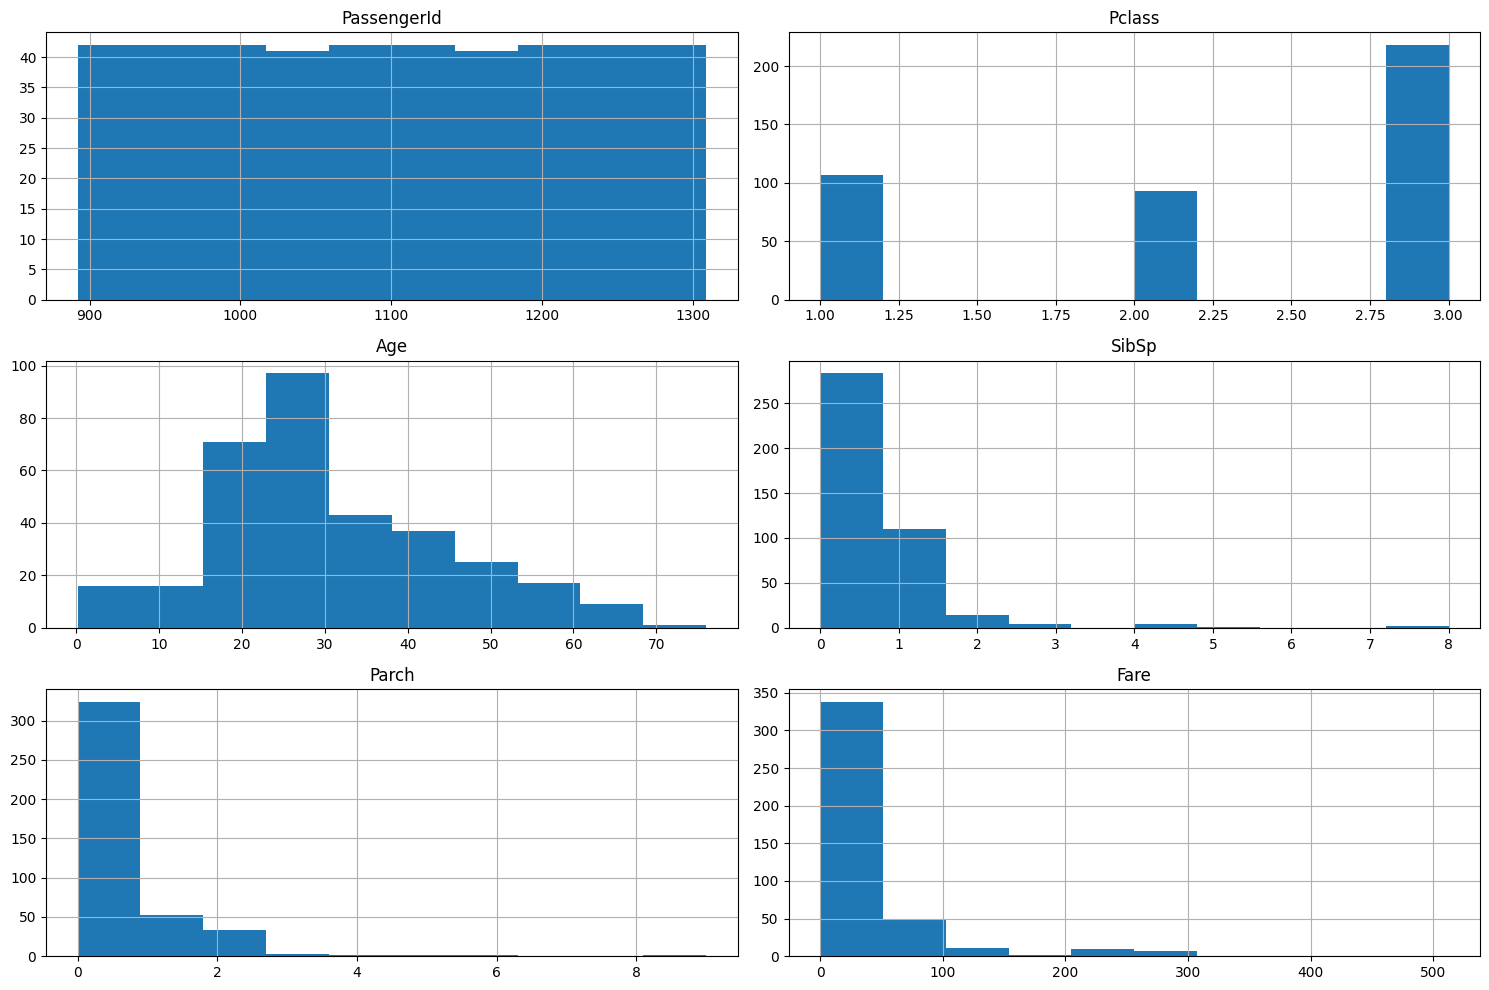

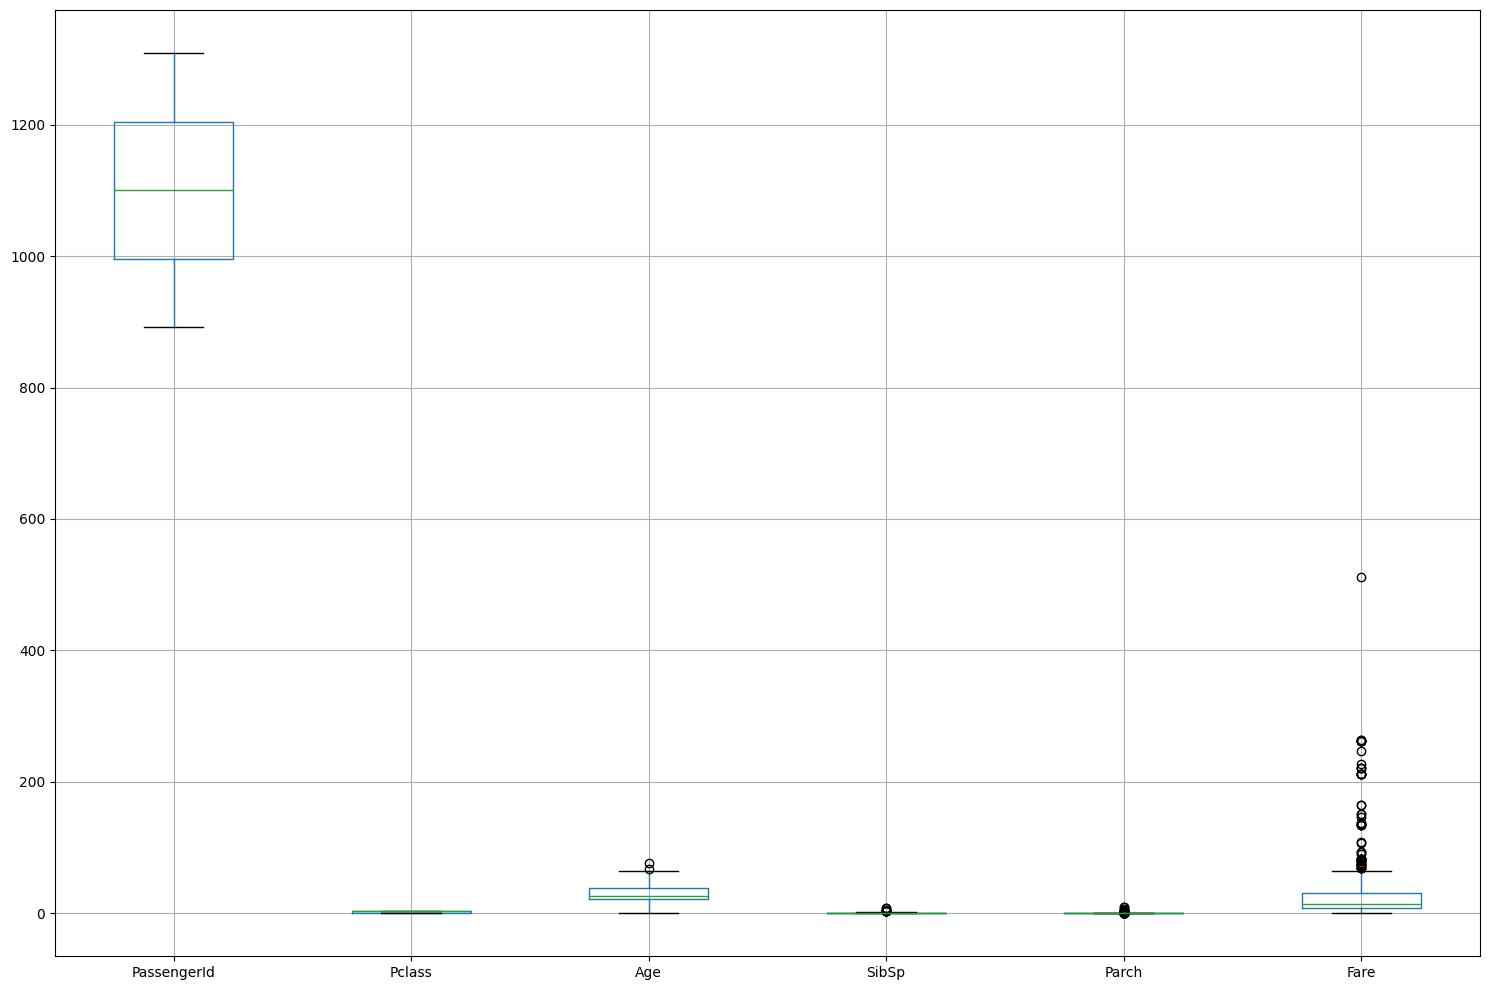

In [12]:
#3.Explore data distributions using histograms and box plots.
#histogram
train_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()
# Boxplot
train_df.boxplot(figsize=(15, 10))
plt.tight_layout()
plt.show()

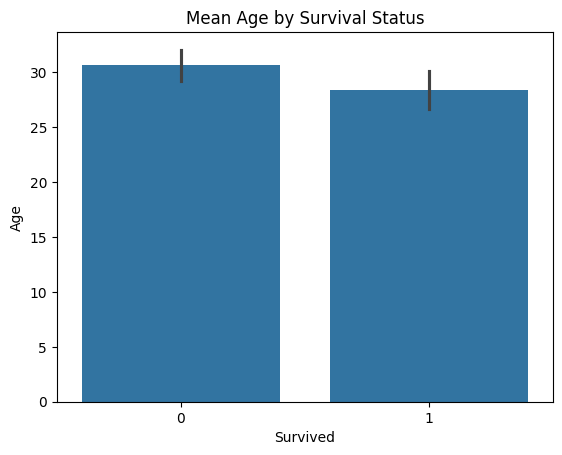

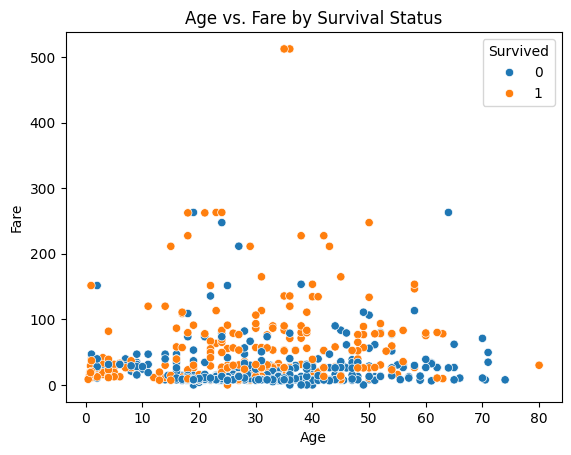

In [15]:
#4.Visualize relationships between features and survival using scatter plots and bar plots.
sns.barplot(x='Survived', y='Age', data=test_df)
plt.title('Mean Age by Survival Status')
plt.show()
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=test_df)
plt.title('Age vs. Fare by Survival Status')
plt.show()


# Data Preprocessing:

In [17]:
# finding median
fare_median = test_df['Fare'].median()
print("Median :", fare_median)
age_median = train_df['Age'].median()
print("Median :", age_median)


Median : 14.4542
Median : 27.0


In [21]:

# Importing required libraries for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV   # For splitting data & model tuning
from sklearn.preprocessing import LabelEncoder                                       # For encoding categorical data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report  # For model performance metrics
# Function to preprocess the Titanic dataset
def preprocess_data(df):
    df = df.copy()  # Create a copy of the dataframe to avoid modifying the original data
    # Fill missing values in 'Embarked' column with its most frequent value (mode)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    if 'Fare' in df.columns:
        df['Fare'].fillna(df['Fare'].median(), inplace=True)# If 'Fare' column exists (especially in test data), fill missing values with the median fare
    label_encoder = LabelEncoder()    # convert categorical text data into numeric form
    df['Sex'] = label_encoder.fit_transform(df['Sex'])# Convert 'Sex' column (male/female) into numeric values (0 or 1)
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'])# Convert 'Embarked' column (C, Q, S) into numeric values
    df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True, errors='ignore')
    return df
# Apply preprocessing to both train and test datasets
train_processed = preprocess_data(train_df)   # Preprocess training data
test_processed = preprocess_data(test_df)     # Preprocess test data
train_processed


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


# Building Predictive Models:

In [29]:
#1.Split the preprocessed dataset into training and testing sets.
X = test_processed.drop('Survived', axis=1)
y = test_processed['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**LightGBM** (Light Gradient Boosting Machine) is a high-performance, open-source gradient boosting framework developed by Microsoft. It's an evolution of Gradient Boosting Decision Trees (GBDT), specifically designed for speed and efficiency when handling large datasets.

In [30]:
!pip install lightgbm

In [31]:
# import lgbm
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_val)
print("LightGBM Performance:")
print(classification_report(y_val, lgb_preds))

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


**XGBoost**(eXtreme Gradient Boosting) is a highly efficient and popular open-source gradient boosting framework based on decision trees. It's renowned in machine learning for its speed, performance, and ability to deliver state-of-the-art results on structured data (like tabular data).

In [32]:
!pip install xgboost

In [33]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)
print("XGBoost Performance:")
print(classification_report(y_val, xgb_preds))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



**Cross Validation**:Cross-validation is a statistical technique used in Machine Learning to evaluate how well a model will generalize to new, unseen data by systematically partitioning the available data into complementary subsets.\
The primary goal is to prevent overfitting and obtain a more reliable estimate of the model's performance than a simple train/test split provides.

In [34]:
#5.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
#cross validation
lgb_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy')
print("LightGBM CV Accuracy:", lgb_scores.mean())
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print("XGBoost CV Accuracy:", xgb_scores.mean())

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [37]:
final_preds = lgb_model.predict(train_processed) #Predict on the preprocessed test dataset
print("Predictions on Test Set (LightGBM):", final_preds[:10]) #the first 10 predictions

Predictions on Test Set (LightGBM): [0 0 0 1 0 0 1 0 1 0]


# **Comparative Analysis:**

1.The analysis of performance metrics reveals that XGBoost held a marginal advantage in overall cross-validation accuracy (approximately 82% vs. LightGBM's 81%).\
While LightGBM demonstrated a stronger balance between precision and recall across all classes, showing superior stability, XGBoost exhibited slightly higher precision for the minority class.\
Both models generalized well with low signs of overfitting, but the choice boils down to a trade-off: XGBoost for maximum accuracy, and LightGBM for faster training and highly consistent, balanced performance.


2.The comparison highlights a clear trade-off.\
 LightGBM's strength is its speed and resource efficiency, driven by its leaf wise growth, which makes it ideal for large-scale or time sensitive tasks.\
Its weakness is a marginal sacrifice in overall accuracy.
Conversely, XGBoost's strength is its superior robustness and maximum predictive accuracy(achieved at approx 82%), primarily due to strong regularization. Its weakness is the slower training time.\
 The overall interpretation is that LightGBM is the choice when speed and consistency matter most, while XGBoost is preferred when absolute maximum accuracy is the priority.